In [1]:
import re
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [3]:
dont_include = ['preparing','special','secondary','role','made','modern','achieved','complete','bank','position','size','trust','responsibility','project','require','requirements','requirement','chennai','pune','bachelor','achievements', 'projects', 'experience', 'skills', 'certifications', 'education', 'references', 'languages', 'hobbies', 'interests','details', 'university', 'exprience','experience', 'january', 'company', 'maharashtra', 'description', 'skill', 'less', 'year', 'months', 'mumbai', 'pune', 'college', 'cases', 'high', 'education', 'monthscompany', 'india', 'work', 'skills', 'working', 'responsibilities', 'projects', 'new', 'nagpur', 'team', 'international', 'using', 'good', 'system', 'involved', 'environment', 'knowledge', 'functional', 'documents', '2014', '2017', 'worked', 'build', 'product', 'based', 'used', 'requirements', 'process', 'user', 'various', 'report', 'client', 'ltd', 'processes', 'pvt', 'maintain', 'documentation', 'ms', 'inspection', 'drawings', 'quality', 'name', 'etc', 'job', 'ensure', 'like', 'sap', 'technical', 'hana', 'backup', 'installation', 'issues', 'support', 'windows', 'creating', 'users', 'different', 'technologies', 'role', 'power', 'control', 'completed', 'per', 'activities', 'june', 'school', 'training', 'office', 'handling', 'customers', 'customer', 'manager', 'time', 'order', 'ãâ', 'delivery', 'reports', 'performance']

In [4]:
unified_list = [
    'web', 'design', 'website', 'development', 'application', 'service', 'management', 'developer', 'designer', 'software', 
    'developed', 'site', 'marketing', 'business', 'html', 'content', 'state', 'cs', 'javascript', 'data', 'created', 'graphic', 
    'city', 'system', 'client', 'testing', 'test', 'patient', 'care', 'plan', 'procedure', 'information', 'student', 'tool', 
    'security', 'professional', 'staff', 'program', 'equipment', 'medical', 'sale', 'product', 'need', 'relationship', 'account', 
    'maintained', 'store', 'strategy', 'merchandise', 'communication', 'goal', 'revenue', 'inventory', 'market', 'area', 'current', 
    'sql', 'database', 'server', 'ssis', 'query', 'package', 'table', 'oracle', 'production', 'stored', 'solution', 'ssrs', 'tuning', 
    'implementation', 'abap', 'consultant', 'analysis', 'module', 'master', 'integration', 'configuration', 'react', 'spring', 
    'code', 'java', 'implemented', 'framework', 'python', 'aws', 'django', 'medium', 'public', 'relation', 'event', 'social', 
    'press', 'including', 'pr', 'community', 'campaign', 'pmo', 'operation', 'budget', 'resource', 'improvement', 'risk', 'change', 
    'leadership', 'financial', 'agile', 'employee', 'policy', 'daily', 'safety', 'operational', 'cost', 'member', 'network', 
    'cisco', 'firewall', 'engineer', 'switch', 'troubleshooting', 'router', 'infrastructure', 'access', 'hardware', 'device', 
    'routing', 'mechanical', 'engineering', 'manufacturing', 'maintenance', 'component', 'material', 'machine', 'part', 'solidworks', 
    'designed', 'specification', 'record', 'technology', 'computer', 'problem', 'hr', 'human', 'benefit', 'payroll', 'recruitment', 
    'compensation', 'department', 'compliance', 'fitness', 'health', 'exercise', 'group', 'personal', 'class', 'wellness', 'nutrition', 
    'trainer', 'certified', 'food', 'beverage', 'guest', 'restaurant', 'menu', 'standard', 'item', 'hotel', 'order', 'satisfaction', 
    'finance', 'accounting', 'tax', 'reconciliation', 'statement', 'prepared', 'audit', 'entry', 'payment', 'electrical', 'repair', 
    'wiring', 'circuit', 'installed', 'electrician', 'teacher', 'learning', 'classroom', 'lesson', 'teaching', 'educational', 
    'instruction', 'curriculum', 'positive', 'child', 'parent', 'behavior', 'etl', 'informatica', 'source', 'mapping', 'warehouse', 
    'file', 'net', 'aspnet', 'c', 'jquery', 'digital', 'brand', 'creative', 'google', 'devops', 'cloud', 'deployment', 'jenkins', 
    'docker', 'continuous', 'linux', 'azure', 'pipeline', 'git', 'automation', 'art', 'adobe', 'interior', 'recovery', 'administrator', 
    'monitoring', 'microsoft', 'science', 'model', 'research', 'year', 'scientist', 'civil', 'construction', 'building', 'water', 
    'analyst', 'stakeholder', 'use', 'diagram', 'worker', 'contractor', 'schedule', 'blockchain', 'faculty', 'contract', 'smart', 
    'york', 'banking', 'branch', 'loan', 'credit', 'cash', 'call', 'center', 'agent', 'aircraft', 'aviation', 'flight', 'pilot', 
    'personnel', 'vehicle', 'automotive', 'claim', 'director', 'english', 'language', 'grade', 'architect', 'architecture', 
    'architectural', 'planning', 'apparel', 'associate', 'display', 'organized', 'floor', 'merchandising', 'fashion', 'agricultural', 
    'farm', 'crop', 'agriculture', 'plant', 'advocate', 'legal', 'victim', 'family', 'provided'
]

In [5]:
# df = pd.read_csv(r'../data/UpdatedResumeDataSet.csv')
df = pd.read_csv(r'../data/Dataset.txt')
df.rename(columns={'Text': 'Resume'}, inplace=True)
df.head(2)

,Category,Resume
0,Accountant,﻿________________\r\n\r\nEDUCATION\r\nOMBA - E...
1,Accountant,﻿________________\r\n\r\nHOWARD GERRARD\r\nAcc...


In [6]:
df['Resume'].drop_duplicates()

0        ﻿________________\r\n\r\nEDUCATION\r\nOMBA - E...
1        ﻿________________\r\n\r\nHOWARD GERRARD\r\nAcc...
2        ﻿________________\r\n\r\nKevin Frank\r\nSENIOR...
3        ﻿________________\r\n\r\nPlace of birth\r\nNat...
4        ﻿________________\r\n\r\nStephen Greet, CPA\r\...
                               ...                        
13384    ﻿________________\r\n\r\nJESSICA CLAIRE\r\nMon...
13385    ﻿________________\r\n\r\nJESSICA CLAIRE\r\nMon...
13386    ﻿________________\r\n\r\nSUMMARY\r\nJessica Cl...
13387    ﻿________________\r\n\r\nJESSICA CLAIRE\r\nMon...
13388    ﻿________________\r\n\r\nWEBSITES, PORTFOLIOS,...
Name: Resume, Length: 12175, dtype: object

In [7]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [8]:
df['Category'].unique()

array(['Accountant', 'Advocate', 'Agriculture', 'Apparel', 'Architecture',
       'Arts', 'Automobile', 'Aviation', 'Banking', 'Blockchain', 'BPO',
       'Building and Construction', 'Business Analyst', 'Civil Engineer',
       'Consultant', 'Data Science', 'Database', 'Designing', 'DevOps',
       'Digital Media', 'DotNet Developer', 'Education',
       'Electrical Engineering', 'ETL Developer', 'Finance',
       'Food and Beverages', 'Health and Fitness', 'Human Resources',
       'Information Technology', 'Java Developer', 'Management',
       'Mechanical Engineer', 'Network Security Engineer',
       'Operations Manager', 'PMO', 'Public Relations',
       'Python Developer', 'React Developer', 'Sales', 'SAP Developer',
       'SQL Developer', 'Testing', 'Web Designing'], dtype=object)

Text(0, 0.5, 'Frequency of Records')

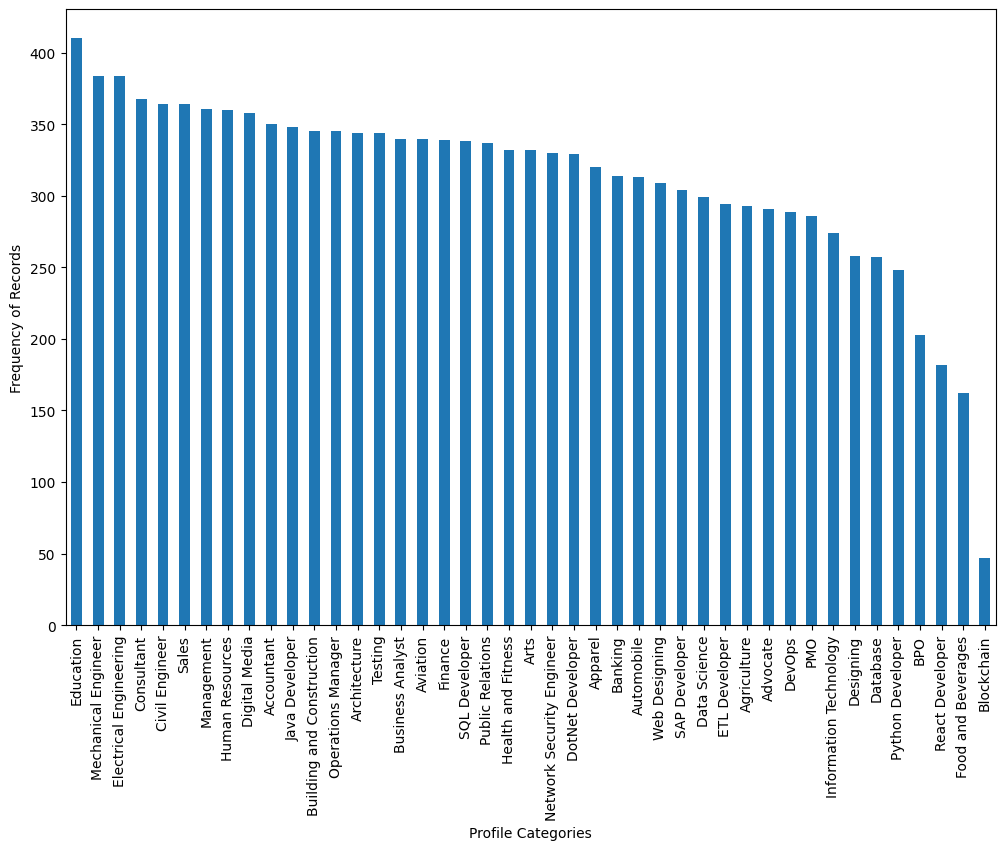

In [9]:
plt.figure(figsize=(12,8))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Profile Categories')
plt.ylabel('Frequency of Records')

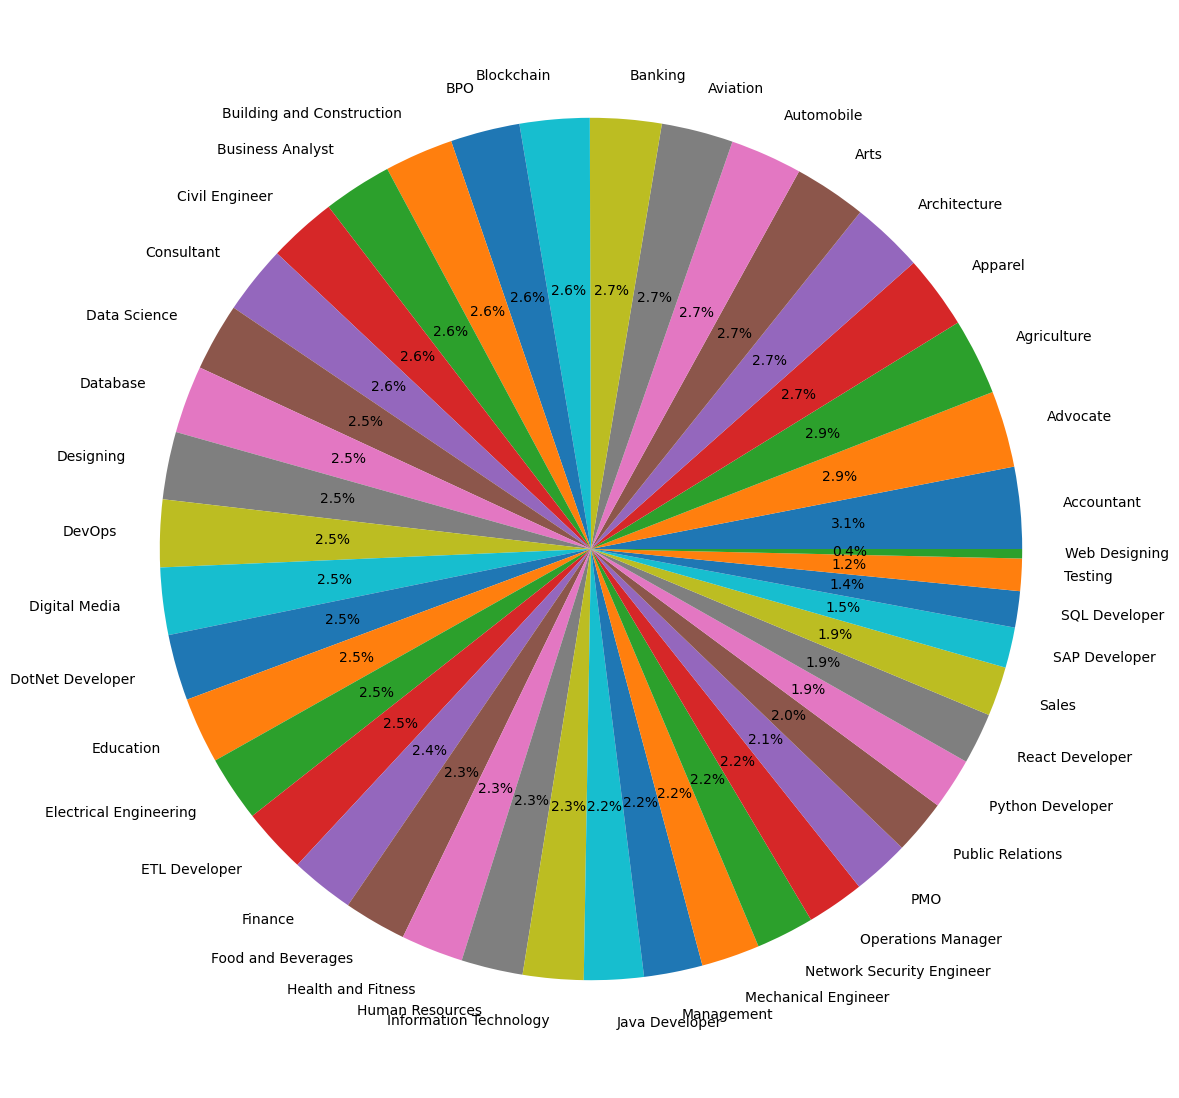

In [10]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(20,14))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [11]:
df.head()

,Category,Resume
0,Accountant,﻿________________\r\n\r\nEDUCATION\r\nOMBA - E...
1,Accountant,﻿________________\r\n\r\nHOWARD GERRARD\r\nAcc...
2,Accountant,﻿________________\r\n\r\nKevin Frank\r\nSENIOR...
3,Accountant,﻿________________\r\n\r\nPlace of birth\r\nNat...
4,Accountant,"﻿________________\r\n\r\nStephen Greet, CPA\r\..."


In [12]:
# Resume text Cleaning
def clean_text(text):
    email_pattern = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
    links_pattern = re.compile(r'https?:\/\/\S+|www\.\S+')

    cleaned_text = email_pattern.sub('',text)
    cleaned_text = links_pattern.sub('',cleaned_text)

    cleaned_text = re.sub('[^\w\s]','',cleaned_text)
    cleaned_text = re.sub(r'[â]', '', cleaned_text) 
    cleaned_text = re.sub(r'[ã]', '', cleaned_text) 
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    
    cleaned_text = cleaned_text.lower()

    cleaned_text = " ".join([word for word in cleaned_text.split() if (word not in stopwords) and (word not in dont_include)])
    cleaned_text = " ".join([word for word in cleaned_text.split() if (word in unified_list)])
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])

    return cleaned_text

df['Resume'] = df['Resume'].apply(clean_text)
df['Resume'].head()

0    leadership science accounting certified manage...
1    information financial business department dire...
2    leadership state business accounting financial...
3    certified public financial business record fin...
4    accounting accounting financial york current r...
Name: Resume, dtype: object

In [13]:
le = LabelEncoder()
df['Category_Label'] = le.fit_transform(df[['Category']])
df.head()

,Category,Resume,Category_Label
0,Accountant,leadership science accounting certified manage...,0
1,Accountant,information financial business department dire...,0
2,Accountant,leadership state business accounting financial...,0
3,Accountant,certified public financial business record fin...,0
4,Accountant,accounting accounting financial york current r...,0


In [26]:
df['Resume'][0]

'leadership science accounting certified management certified financial analyst compliance banking certified public account certified financial banking leadership teaching teacher accounting teaching developed teaching curriculum teaching professional oracle english sql professional'

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Resume'])
y = df['Category_Label']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=32)

X_train

<8970x282 sparse matrix of type '<class 'numpy.float64'>'
	with 342020 stored elements in Compressed Sparse Row format>

In [27]:
print(len(unified_list))

289


In [16]:
len(df['Category_Label'].unique())

43

### Model Training

In [17]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score

models = {
    "SVC": SVC(),
    "NaiveBayes": MultinomialNB(),
    "XGBoost": XGBClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "Logistic_Regression": LogisticRegression()
}

In [18]:
n = len(models)

for key,value in models.items():
    model = value 
    model.fit(X_train,y_train)

    # make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Trained Data performance
    model_train_acc = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # Specify 'weighted', 'macro', or 'micro'
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")


    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')

    print(f"Model: {key}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print("-----------------------------------------------------------------------------------------------------------------")


Model: SVC
Model Performance for Training set
- Accuracy: 0.9039
- F1-Score: 0.9033
- Precision: 0.9060
- Recall: 0.9039

Model Performance for Test set
- Accuracy: 0.7628
- F1-Score: 0.7623
- Precision: 0.7692
- Recall: 0.7628
-----------------------------------------------------------------------------------------------------------------
Model: NaiveBayes
Model Performance for Training set
- Accuracy: 0.7240
- F1-Score: 0.7158
- Precision: 0.7360
- Recall: 0.7240

Model Performance for Test set
- Accuracy: 0.6931
- F1-Score: 0.6830
- Precision: 0.7063
- Recall: 0.6931
-----------------------------------------------------------------------------------------------------------------
Model: XGBoost
Model Performance for Training set
- Accuracy: 0.9877
- F1-Score: 0.9877
- Precision: 0.9878
- Recall: 0.9877

Model Performance for Test set
- Accuracy: 0.7834
- F1-Score: 0.7806
- Precision: 0.7818
- Recall: 0.7834
-----------------------------------------------------------------------------

So we will hyperparameter tune these models 
- SVC
- XGBoost
- Random Forest
- Gradient Boosting

In [28]:
# SVC params

svc_params = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01], 
    'degree': [3,4,5]       
}

xgb_params = {
    # 'eta': [0.05,0.1,0.2],
    'max_depth': [13,15,17,19],
    'min_child_weight': [3,5],
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.1, 0.2]
}

rf_params = {
    'n_estimators': [50,100,200,500],
    'max_depth': [8,10,12],
    'max_features': ['sqrt','log2']
}

grdb_params = {
    'min_samples_leaf': [3,5,7,9],
    'max_depth': [13,15,17,19],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# models list for hyper-parameter tuning
cv_models = [
    # ("SVC",SVC(),svc_params),
    ("XGBoost",XGBClassifier(use_label_encoder=False),xgb_params),
    # ("RandomForest",RandomForestClassifier(),rf_params),
    # ("GradientBoost",GradientBoostingClassifier(),grdb_params),
] 

In [29]:
from sklearn.model_selection import GridSearchCV

tuned_model = {}
model_params = {}

for name, model, params in cv_models:
    gridSearchCV = GridSearchCV(estimator=model,param_grid=params,cv=3,verbose=2,refit=True,n_jobs=-1)
    tuned_model[name] = gridSearchCV

    gridSearchCV.fit(X_train,y_train)
    model_params[name] = gridSearchCV.best_params_ 


Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [30]:
for name, param in model_params.items():
    print("-----------------------------------------------------------------------------------\n")
    print(f"For {name}")
    print(param)
    print()

-----------------------------------------------------------------------------------

For XGBoost
{'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 200}



In [31]:
print("Best Tunned Models: \n")

for name,model in tuned_model.items():

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Trained Data performance 
    model_train_acc = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")  # Specify 'weighted', 'macro', or 'micro'
    model_train_precision = precision_score(y_train, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train, y_train_pred, average="weighted")
    
    # Test Data performance 
    model_test_acc = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')

    print(f"Model: {name}")

    print("Model Performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- F1-Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print()

    print("Model Performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- F1-Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print("-----------------------------------------------------------------------------------------------------------------")    



Best Tunned Models: 



Model: XGBoost
Model Performance for Training set
- Accuracy: 0.9876
- F1-Score: 0.9875
- Precision: 0.9877
- Recall: 0.9876

Model Performance for Test set
- Accuracy: 0.7852
- F1-Score: 0.7803
- Precision: 0.7818
- Recall: 0.7852
-----------------------------------------------------------------------------------------------------------------


In [32]:
# so we will choose gradient boost model
import os
import pickle

save_path = "../models"
os.makedirs(save_path, exist_ok=True)

gb_model_path = os.path.join(save_path, "tfidf_XGBoost_model.pkl")
with open(gb_model_path, 'wb') as file:
    pickle.dump(tuned_model['XGBoost'], file)

label_encoder_path = os.path.join(save_path, "label_encoder.pkl")
with open(label_encoder_path, 'wb') as file:
    pickle.dump(le, file)

tfidf_vectorizer_path = os.path.join(save_path, "tfidf_vectorizer.pkl")
with open(tfidf_vectorizer_path, 'wb') as file:
    pickle.dump(tfidf, file)